# **Aprendizaje profundo - Sesión 5  🧠**

> **Descripción:** Cuaderno de contenidos del módulo de aprendizaje profundo para el Dimplomado en Ciencia de Datos de la ENES UNAM León, 2024. <br>
> **Autor:** [Rodolfo Ferro](https://github.com/RodolfoFerro) <br>
> **Contacto:** [ferro@cimat.mx](mailto:ferro@cimat.mx)

## Contenido

### Preámbulo

- Introducción a la reconstrucción de imágenes

### Sección I

1. Introducción a los autoencoders
2. Estructura básica de un autoencoder
3. Funcionamiento de un autoencoder


### Sección II

4. Limitaciones de los autoencoders básicos
5. Introducción a los autoencoders convolucionales
6. Estructura de los autoencoders convolucionales

### Sección III

7. Implementación y entrenamiento de los autoencoders convolucionales
8. Aplicaciones de los autoencoders convolucionales en el denoising de imágenes
9. Trabajos relacionados y avances recientes

### Sección IV - ¡Extra!

10. Segmentación de imágenes
11. Implementación de U-Net



## **Preámbulo**

### Introducción a la reconstrucción de imágenes


- Proceso de generar una imagen de salida a partir de una de entrada, generalmente con el objetivo de **restaurar o mejorar la calidad de la imagen original**.
- En el contexto de los autoencoders y la tarea de denoising, la reconstrucción implica generar una versión limpia y libre de ruido de una imagen ruidosa o de baja calidad.

Es útil y ayuda para:
- Restauración de la calidad visual.
- Preservación de la información relevante.
- Mejora de aplicaciones y análisis (eliminación de ruido).
- Preservación de características y texturas.
- Calidad y experiencia visual.

<center>
    <img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/0*ZE8YXDof_MVxk43k.png" width="50%">
</center>

## **Sección I**

### Introducción a los autoencoders

Son ANNs utilizadas para aprender representaciones eficientes de los datos de entrada sin necesidad de etiquetas o supervisión externa.

### Estructura básica y funcionamiento de un autoencoder

Están diseñadas para aprender representaciones eficientes de los datos de entrada mediante un proceso de compresión y descompresión.

Las partes fundamentales son el encoder y el decoder.

<center>
    <img src="https://lilianweng.github.io/posts/2018-08-12-vae/autoencoder-architecture.png" width="70%">
</center>

#### Encoder

- **Encoder:** Toma los datos de entrada y los transforma en una representación de menor dimensionalidad, también conocida como representación latente.
- **El objetivo del codificador es…** Comprimir la información esencial de los datos en esta representación latente.
- **Usualmente**, el codificador está compuesto por capas de neuronas que reducen gradualmente la dimensionalidad de los datos a medida que se propagan a través de la red. Este proceso de reducción dimensional es crucial para extraer las características más importantes de los datos y deshacerse de la información redundante o ruidosa.

#### Decoder

- **Decoder:** Toma la representación latente generada y la reconstruye en una salida que se asemeja lo más posible a la entrada original.
- **El objetivo del decodificador es…** Descomprimir la representación latente y generar una reconstrucción fiel de los datos de entrada.
- **Al igual que el encoder**, el decodificador está compuesto por capas de neuronas, pero en este caso, las capas aumentan gradualmente la dimensionalidad de la representación latente hasta que se obtiene una salida de la misma dimensión que los datos de entrada originales.

**La idea central es que**, al restringir la capacidad de reconstrucción de la red, se obliga al codificador a aprender representaciones más compactas y significativas de los datos.

**En otras palabras**, se busca que el codificador capture las características más importantes y relevantes de los datos en la representación latente, mientras que el decodificador se encarga de reconstruir los datos de entrada a partir de esa representación latente.

#### Aplicaicones de autoencoders

- **Denoising de imágenes:** Se utilizan para eliminar el ruido de las imágenes y reconstruir versiones más limpias.
Generación de contenido: Pueden generar contenido nuevo y original aprendiendo las características latentes de un conjunto de datos. Esto se utiliza en aplicaciones como la generación de imágenes sintéticas, la creación de música o la generación de texto.
- **Detección de anomalías:** Se utilizan para detectar patrones anormales o inusuales en los datos. Esto se aplica en áreas como la detección de fraudes en transacciones financieras, la detección de intrusiones en sistemas de seguridad o la detección de anomalías en imágenes médicas.
- **Reducción de dimensionalidad:** Los autoencoders se utilizan para reducir la dimensionalidad de los datos, lo que facilita la visualización y comprensión de datos complejos. Esto es útil en análisis exploratorio de datos, visualización de datos de gran dimensión y clustering.

#### Aprendizaje

- **Aprendizaje:** Durante el entrenamiento de los autoencoders, se utilizan pares de datos de entrada y salida correspondientes.
- La red se entrena para **minimizar** la diferencia entre la entrada original y la salida reconstruida..

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import layers

Cargamos los datos.

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


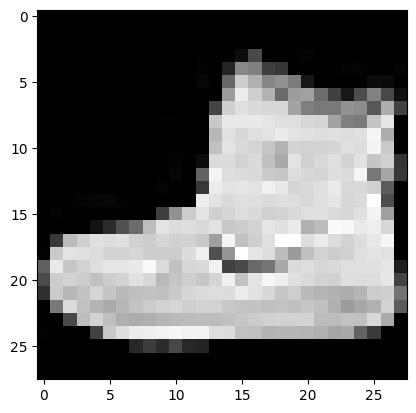

In [ ]:
plt.imshow(x_train[0], cmap='gray')

Creamos la clase Autoencoder con TensorFlow.

In [ ]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim

        # Construimos el encoder
        self.encoder = tf.keras.Sequential([

            # TODO: Añade una capa Flatten
            tf.keras.layers.Flatten(),
            # TODO: Añade una capa Dense -> latent_dim, ReLU
            tf.keras.layers.Dense(latent_dim,activation='relu')
        ])

        # Construimos el decoder
        self.decoder = tf.keras.Sequential([

            # TODO: Añade una capa Dense -> 784, Sigmoid
            tf.keras.layers.Dense(784,activation='sigmoid'),
            # TODO: Añade una capa Reshape -> (28, 28)
            tf.keras.layers.Reshape((28,28))
        ])

    def call(self, x):
        # Esta función nos permite invocar los sub modelos
        # para poder hacer inferencia sobre cada uno (predict)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded

Definimos parámetros y creamos un autoencoder.

In [ ]:
# Definimos dimensión de espacio latente
latent_dim = 64

# Instanciamos un autoencoder
autoencoder = Autoencoder(latent_dim)

Compilamos y entrenamos.

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0404 - val_loss: 0.0132
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0124 - val_loss: 0.0106
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0088 - val_loss: 0.0090


In [ ]:
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 64)                    │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 28, 28)                │          50,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303,602 (1.16 MB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 202,402 (790.64 KB)

In [ ]:
import plotly.graph_objects as go


seen = 'loss' # or 'loss'

hist_values = history.history[seen]
hist_values_val = history.history['val_' + seen]
eje_x = np.arange(len(hist_values))

fig = go.Figure()

fig.add_trace(go.Scatter(x=eje_x,
                         y=hist_values,
                         mode='lines',
                         name=seen))
fig.add_trace(go.Scatter(x=eje_x,
                         y=hist_values_val,
                         mode='lines',
                         name='val_' + seen))
fig.update_layout(title='Historia de entrenamiento',
                   xaxis_title='Épocas',
                   yaxis_title=seen.capitalize())
fig.show()

Exploramos los resultados.

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

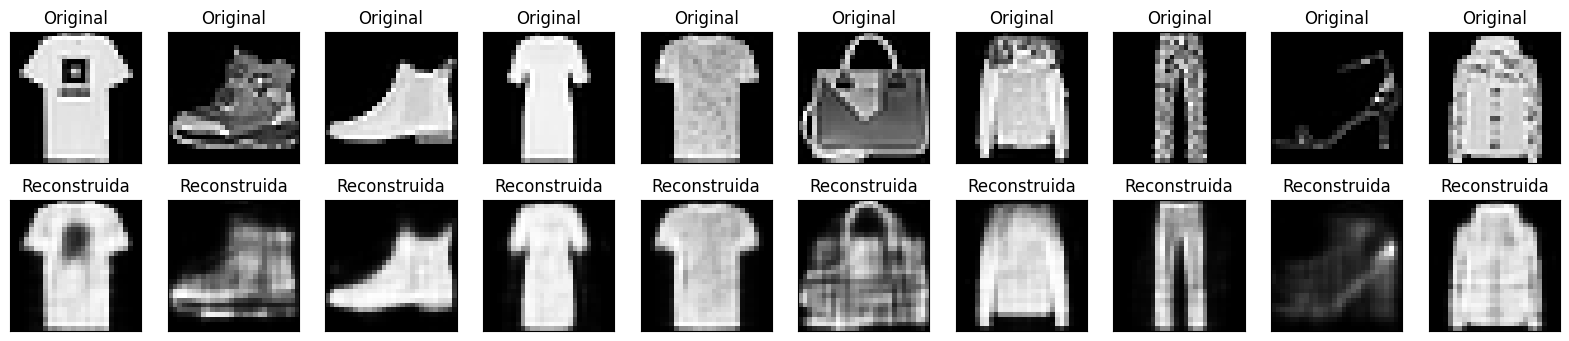

In [ ]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Mostramos imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i + 121])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Mostramos imagen reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i + 121])
    plt.title("Reconstruida")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

**Reto:** ¿Puedes mejorar aún más las reconstrucciones?

Te recomiendo explorar lo siguiente:
- Modifica el número de capas y neuronas por capa. Recuerda que debe ir disminuyendo en el encoder y aumentando en el decoder y deben tener una estructura espejeada.
- Modifica el número de épocas de entrenamiento.
- ¿Quieres intentar reconstruir cosas con convoluciones? Te invito a que lo intentes.


**Lecturas recomendadas:**
- [A 2021 Guide to improving CNNs-Optimizers: Adam vs SGD](https://medium.com/geekculture/a-2021-guide-to-improving-cnns-optimizers-adam-vs-sgd-495848ac6008)

## **Sección II**


### Limitaciones de autoencoders básicos

- **Incapacidad para capturar información espacial:** Los autoencoders básicos pueden tener dificultades para capturar la estructura espacial de las imágenes, ya que no tienen en cuenta la información de vecindad de los píxeles.
- **Sensibilidad a las transformaciones:** Pueden ser sensibles a las transformaciones geométricas, como la rotación o el desplazamiento de la imagen, lo que puede afectar su capacidad de reconstrucción.
- **Autoencoders convolucionales como solución:** Son una variante de los autoencoders que incorporan capas convolucionales para abordar las limitaciones mencionadas.
- **Ventajas de los autoencoders convolucionales:** Mejoran con la capacidad para capturar algunas características espaciales, preservar la estructura y ser más robustos frente a transformaciones geométricas



### Autoencoders convolucionales

La estructura de un autoencoder convolucional consta de dos partes principales: el codificador (encoder) y el decodificador (decoder). Cada una de estas partes está compuesta por capas convolucionales, capas de muestreo y, en algunos casos, capas de convolución transpuesta o de upsampling.

<center>
    <img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*TOJD69Y8dZsKFEW-21xUPg.png" width="70%">
</center>

#### Encoder

- **Capas convolucionales:** Estas capas utilizan filtros convolucionales para extraer características de nivel superior de la entrada.
- **Capas de pooling:** Estas capas reducen la dimensionalidad de las características extraídas al realizar un muestreo o reducción de tamaño, como el max pooling.
- **Funciones de activación:** Después de cada capa convolucional y de muestreo, se aplica una función de activación no lineal, como la función ReLU (Rectified Linear Unit), para introducir no linealidad en la red.

#### Espacio latente

- **Capa de aplanamiento:** Antes de llegar al espacio latente, la salida del codificador se aplanará en un vector unidimensional.
- **Capa densa (fully connected):** La capa densa o fully connected reduce aún más la dimensionalidad y mapea las características a un espacio latente de menor dimensión. Esta capa suele tener una función de activación, como la ReLU o la tangente hiperbólica.

#### Decoder

- **Capas densas (fully connected):** En el decodificador, se utilizan capas densas para aumentar gradualmente la dimensionalidad del espacio latente y reconstruir las características originales.
- **Capas de convolución transpuesta o upsampling:** Estas capas realizan la operación inversa de las capas de muestreo, aumentando gradualmente el tamaño espacial de las características.
- **Capas de convolución:** Al final del decodificador, se utilizan capas convolucionales para generar una salida final con las mismas dimensiones que la entrada original.
- **Función de activación final:** La función de activación final depende del rango de valores de la imagen de salida. Por ejemplo, en imágenes en escala de grises, se puede utilizar una función de activación sigmoide para obtener valores entre 0 y 1.

La estructura del autoencoder convolucional puede variar según la tarea específica y los requisitos del problema. Se pueden agregar capas adicionales, como capas de regularización, capas de normalización o capas de convolución dilatadas, para mejorar el rendimiento y la capacidad de generalización del modelo.

## **Sección III**


### Implementación y entrenamiento de los autoencoders convolucionales

In [ ]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()

        # Creamos el encoder convolucional
        self.encoder = tf.keras.Sequential([

            # TODO: Añade una capa Input -> shape=(28, 28, 1)
            tf.keras.layers.Input((28,28,1)),
            # TODO: Añade una capa Conv2D -> 16, (3, 3), activation='relu', padding='same', strides=2
            tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=2),
            # TODO: Añade una capa Conv2D -> 8, (3, 3), activation='relu', padding='same', strides=2
            tf.keras.layers.Conv2D(8,(3,3),activation='relu',padding='same',strides=2)
        ])

        # Creamos el decoder convolucional
        self.decoder = tf.keras.Sequential([

            # TODO: Añade una capa Conv2DTranspose -> 8, kernel_size=3, activation='relu', padding='same', strides=2
            tf.keras.layers.Conv2DTranspose(8,kernel_size=3,activation='relu',padding='same',strides=2),
            # TODO: Añade una capa Conv2DTranspose -> 16, kernel_size=3, activation='relu', padding='same', strides=2
            tf.keras.layers.Conv2DTranspose(16,kernel_size=3,activation='relu',padding='same',strides=2),
            # TODO: Añade una capa Conv2D -> 1, (3, 3), activation='sigmoid', padding='same'
            tf.keras.layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')
        ])

    def call(self, x):
        # Esta función nos permite invocar los sub modelos
        # para poder hacer inferencia sobre cada uno (predict)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded

**Lecturas recomendadas:**

- [Convolution, Padding, Stride, and Pooling in CNN](https://medium.com/analytics-vidhya/convolution-padding-stride-and-pooling-in-cnn-13dc1f3ada26)
- [Why do we need conv2d_transpose?
](https://medium.com/@vaibhavshukla182/why-do-we-need-conv2d-transpose-2534cd2a4d98)
- [Deconvolution](https://vincmazet.github.io/bip/restoration/deconvolution.html)
- [Image Segmentation using deconvolution layer in Tensorflow](https://cv-tricks.com/image-segmentation/transpose-convolution-in-tensorflow/)

### Aplicaciones de los autoencoders convolucionales en el denoising de imágenes

Para poder explorar un ejemplo de aplicación de autoencoders donde los utilicemos para quitar el ruido de alunas imágenes, volveremos a utilizar el dataset de modas y le agregaremos algo de ruido a las imágenes. De este modo, entrenaremos a la red para que aprenda cómo debe verse una imagen a partir de una con ruido.

Cargaremos y preprocesaremos nuevamente los datos.

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


Agregamos ruido a los datos.

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

Podemos explorar cómo se ven los datos con algo de ruido.

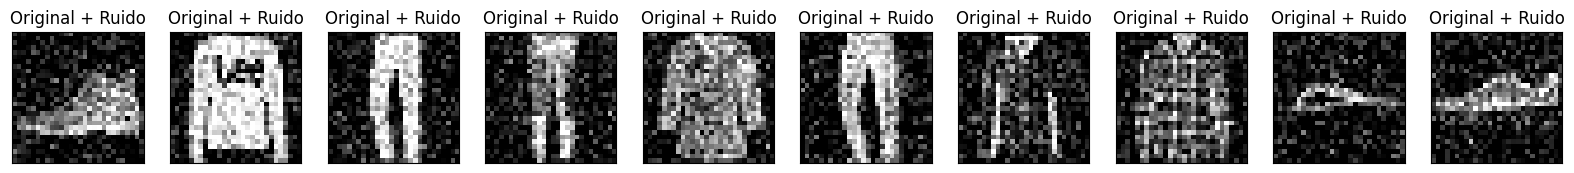

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("Original + Ruido")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.set_xticks([])
    ax.set_yticks([])

plt.grid(False)

Instanciaremos, compilaremos y entrenaremos un nuevo autoencoder llamado "denoiser".

In [ ]:
denoiser = Denoise()

In [ ]:
denoiser.compile(optimizer='adam', loss='mse')

history = denoiser.fit(x_train_noisy, x_train,
                       epochs=10,
                       shuffle=True,
                       validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - loss: 0.0348 - val_loss: 0.0112
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - loss: 0.0108 - val_loss: 0.0100
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - loss: 0.0089 - val_loss: 0.0086
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - loss: 0.0084 - val_loss: 0.0081
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - loss: 0.0075 - val_loss: 0.0075


In [ ]:
import plotly.graph_objects as go


seen = 'loss' # or 'loss'

hist_values = history.history[seen]
hist_values_val = history.history['val_' + seen]
eje_x = np.arange(len(hist_values))

fig = go.Figure()

fig.add_trace(go.Scatter(x=eje_x,
                         y=hist_values,
                         mode='lines',
                         name=seen))
fig.add_trace(go.Scatter(x=eje_x,
                         y=hist_values_val,
                         mode='lines',
                         name='val_' + seen))
fig.update_layout(title='Historia de entrenamiento',
                   xaxis_title='Épocas',
                   yaxis_title=seen.capitalize())
fig.show()

Podemos explorar los detalles de ambos submodelos.

In [ ]:
denoiser.encoder.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
denoiser.decoder.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose_4 (Conv2DTranspose) │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

Aplicamos la inferencia sobre las imágenes ruidosas utilizando ambos modelos.

In [ ]:
encoded_imgs = denoiser.encoder(x_test_noisy).numpy()
decoded_imgs = denoiser.decoder(encoded_imgs).numpy()

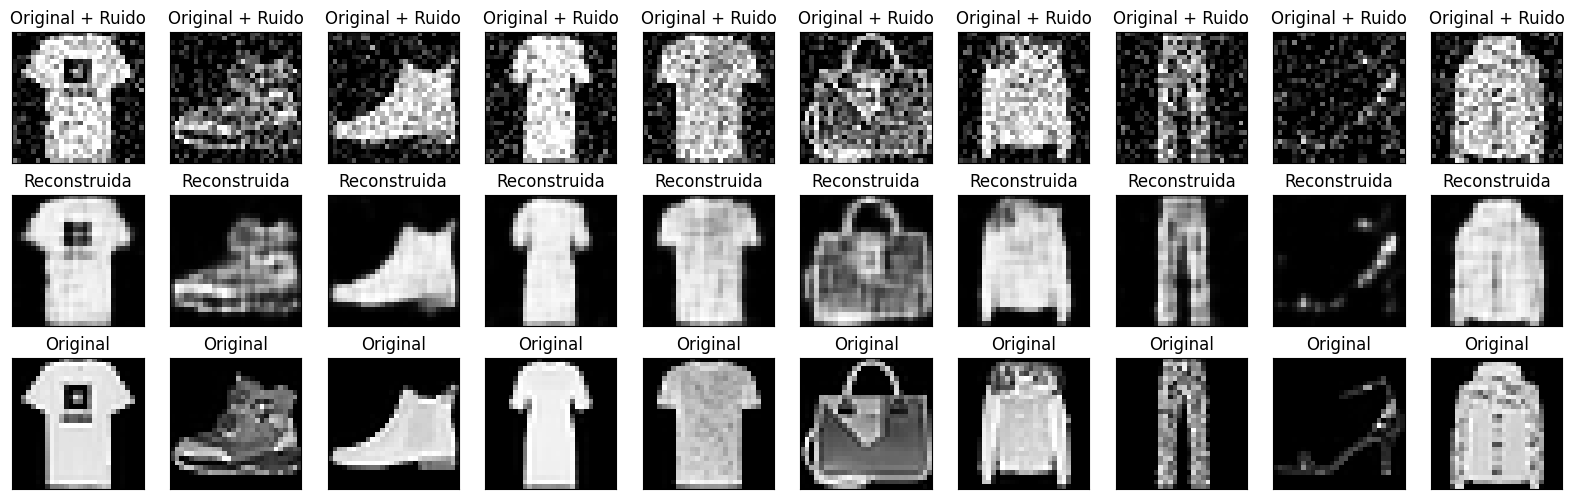

In [ ]:
n = 10
plt.figure(figsize=(20, 6))


for i in range(n):

    # Mostramos original + ruido
    ax = plt.subplot(3, n, i + 1)
    plt.title("Original + Ruido")
    plt.imshow(tf.squeeze(x_test_noisy[i + 121]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Mostramos reconstrucción
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("Reconstruida")
    plt.imshow(tf.squeeze(decoded_imgs[i + 121]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    # Mostramos original
    cx = plt.subplot(3, n, i + n + n + 1)
    plt.title("Original")
    plt.imshow(tf.squeeze(x_test[i + 121]))
    plt.gray()
    cx.get_xaxis().set_visible(False)
    cx.get_yaxis().set_visible(False)

plt.savefig('imagen_sin_ruido.png', dpi=300)

**Reto:** ¿Puedes mejorar aún más el modelo?

Te recomiendo explorar lo siguiente:
- Modifica el número de capas y parámetros de convolución por capa.
- Modifica el número de épocas de entrenamiento.
- Puedes explorar el remover ruido de imágenes con más canales (imágenes RGB) utilizando otros datasets.

### Trabajos relacionados y avances recientes


Ha habido varios trabajos de investigación y avances recientes que han contribuido al desarrollo de nuevas arquitecturas, técnicas de entrenamiento mejoradas y aplicaciones emergentes.

- **UNet:** Es ampliamente utilizada en el campo de la segmentación de imágenes, pero también se ha aplicado con éxito en tareas de denoising.
- **Variational Autoencoders (VAEs):** Los VAEs son una variante de los autoencoders que se utilizan para el aprendizaje de distribuciones latentes. Han demostrado ser efectivos en el denoising de imágenes al aprender representaciones latentes que siguen una distribución probabilística, lo que permite una generación más controlada y realista de imágenes limpias.
- **GANs y Autoencoders Generativos (GANs-AE):** La combinación de las GANs y los AE ha llevado al desarrollo de los GANs-AE. Estos modelos aprovechan la capacidad de los GANs para generar imágenes realistas y los autoencoders para aprender representaciones latentes eficientes. Los GANs-AE han demostrado ser efectivos en el denoising y la generación de imágenes de alta calidad.


#### **Tareas en el campo de la visión artificial**

1. **Clasificación de imágenes:** La tarea de clasificación de imágenes implica asignar una etiqueta o categoría a una imagen de entrada. Esto implica entrenar un modelo para reconocer y distinguir diferentes objetos, personas o escenas en una imagen.
2. **Detección de objetos:** La detección de objetos implica localizar y clasificar múltiples objetos en una imagen. El objetivo es detectar la presencia y la ubicación de objetos específicos en una escena, a menudo utilizando cuadros delimitadores para delinear las regiones donde se encuentran los objetos.
3. **_Denoising_ o reconstrucción de imágenes:** Consiste en eliminar o reducir el ruido presente en una imagen, obteniendo una versión más limpia y clara. Esta tarea es relevante en áreas como la fotografía, la medicina y la seguridad..
4. **Segmentación semántica:** La segmentación semántica implica asignar una etiqueta a cada píxel de una imagen para identificar y delimitar las diferentes regiones o objetos presentes. El objetivo es comprender la estructura y el contenido de una imagen a nivel de píxel.
5. **Detección de rostros:** La detección de rostros es una tarea específica de la visión artificial que implica detectar y localizar los rostros en una imagen. Es ampliamente utilizado en aplicaciones de reconocimiento facial, análisis de emociones y sistemas de seguridad.
6. **Reconocimiento y verificación facial:** El reconocimiento facial se refiere a la tarea de identificar y reconocer a una persona específica a partir de una imagen o secuencia de imágenes. La verificación facial se enfoca en verificar si una imagen de rostro coincide con una identidad específica.
7. **Estimación de pose:** La estimación de pose se refiere a la tarea de determinar la posición y orientación de un objeto o persona en una imagen. Esto implica detectar y rastrear las articulaciones o puntos clave en una imagen para comprender la postura y el movimiento.
8. **Estimación de profundidad:** La estimación de profundidad implica inferir la información de la distancia o la profundidad de los objetos en una imagen. Es útil en aplicaciones de realidad virtual, conducción autónoma y sistemas de navegación.
9. **Super-resolución:** La super-resolución se refiere a aumentar la resolución o la calidad de una imagen de baja resolución. El objetivo es generar una versión de alta resolución que capture más detalles y claridad.


## **Sección IV - ¡Extra!**

### **Clonamos el repositorio**

Comenzaremos clonando el repositorio y asignando a la carpeta como la raíz.

In [ ]:
!git clone https://github.com/RodolfoFerro/modulo-deep-learning.git
%cd modulo-deep-learning
!ls

fatal: destination path 'modulo-deep-learning' already exists and is not an empty directory.
/content/modulo-deep-learning
assets	banner.png  data  notebooks  README.md	slides	tools


La estructura del código fuente es como sigue:
- `tools/unet/model.py` - Contiene la implementación del U-Net.
- `tools/data.py` - Contiene funciones de utilería para carga de datos.
- `tools/image.py` - Coniene funciones de utilería para cargar imágenes y mostrar los resultados de las inferencias.
- `main.py` - Contiene una sencilla implementación de este cuaderno en un script de Python para entrenar el modelo.

### **Cargamos los datos**

A continuación procedemos a importar algunas bibliotecas y el código base del modelo.

Haremos uso de alunas funciones que permiten cargar datos que encuentras en el folder `data`.

Comenzaremos importando las funciones de los módulos a utilizar.

In [ ]:
from tools.data import train_generator
from tools.data import test_generator
from tools.data import save_results

Procedemos a crear un diccionario de configuración para cargar datos.

In [ ]:
data_gen_args = dict(
    rotation_range=0.2,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = train_generator(
    2, 'data/membrane/train',
    'image', 'label',
    data_gen_args,
    save_to_dir=None
)


### **Creamos el modelo**

Ahora, procederemos a crear el modelo. Para ello, dos opciones serán previstas.

**OPCIÓN A:** Creamos nuestro propio U-Net con nuestras propias características, basándonos en la propuesta original:

<center>
    <img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-07-07_at_9.08.00_PM_rpNArED.png" width="60%">
</center>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import Adam


def unet(pretrained_weights=None, input_size=(256, 256, 1)):
    """U-Net model constructor.

    Parameters
    ----------
    pretrained_weights : str
        Path to pretrained weights.
    input_size : tuple
        Spatial size of the expected input image.
    """

    inputs = Input(input_size)

    # Convolution chain #1
    # conv_1 = ...
    conv_1 = Conv2D(64, 3, activation='relu', kernel_initializer='he_normal')(inputs)

    # Continua aquí con tu propia implementación...

**OPCIÓN B:** Creamos una instancia del modelo ya implementado y entrenamos con los datos.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

from tools.unet.model import unet

# Replicable experiments
tf.random.set_seed(42)
np.random.seed(42)

model = unet()

model_checkpoint = ModelCheckpoint(
    'unet_membrane.keras',
    monitor='loss',
    verbose=1,
    save_best_only=True
)

In [ ]:
history = model.fit(
    train_gen,
    steps_per_epoch=300,
    epochs=5,
    callbacks=[model_checkpoint]
)

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Epoch 1/5
 73/300 ━━━━━━━━━━━━━━━━━━━━ 1:08:54 18s/step - accuracy: 0.7459 - loss: 0.5562

KeyboardInterrupt: 

In [ ]:
import plotly.express as px
import numpy as np

losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

**Hasta este punto deberías haber entrenado exitosamente un U-Net con algunas imágenes médicas.**

Una vez entrenado el modelo, podemos realizar pruebas de inferencia con el conjunto de pruebas que se encuentra en la misma carpeta de datos.

In [ ]:
test_gen = test_generator('data/membrane/test')
results = model.predict(test_gen, verbose=True)
save_results('data/results', results)


### **Resultados gráficos**

El código base provee algunas funciones para cargar, inferir y crear máscaras de los resultados al trabajar sobre algunas imágenes.

Procedemos a importar las funciones del módulo de imágenes.

In [ ]:
from tools.image import load_test_image
from tools.image import inference_over_image
from tools.image import create_mask
from tools.image import overlay_mask

Cargamos una imagen del directorio de prueba, especificando con un número entero el índice de alguna de las 30 imágenes (`[0, 29]`).

In [ ]:
img = load_test_image(0)

Usamos el modelo previamente entrenado para inferir sobre la imagen previamente cargada.

In [ ]:
out = inference_over_image(model, img)

Creamos una máscara a partir de la inferencia.

In [ ]:
mask = create_mask(out)

Sobreponemos la máscara en la imágen original para validar el resulatdo.

In [ ]:
res = overlay_mask(img, mask)

**¡Felicidades! Has utilizado exitosamente tu modelo entrenado sobre algunas imágenes médicas.**

**Reto:** Yo me he encargado de enfocarme en utilizar las detecciones para la identificación de pared celular, sin embargo, puedes modificar o crear tus propias funciones para la detección celular completa.

Por otro lado, no debes limitarte a ello, sino que puedes crear o cargar tu propio conjunto de datos para segmentar otro tipo de elementos, como las mitocondrias (echa un vistazo al [Electron Microscopy Dataset](https://www.epfl.ch/labs/cvlab/data/data-em/)).

--------

> Contenido creado por **Rodolfo Ferro**, 2024. <br>
> Para cualquier retroalimentación, puedes contactarme a través del correo [ferro@cimat.mx](mailto:ferro@cimat.mx).